In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler, SMOTEN

In [ ]:
!pip install odfpy

In [ ]:
def my_func(loc):
  result = re.findall("\ [A-Z]{2}$", loc)
  if len(result) == 1:
    return result[0][1:]
  else:
    return loc

In [ ]:
data = pd.read_excel('final_project.ods', engine = 'odf', dtype=str)
data["location"] = data["location"].apply(my_func)

print(len(data["location"].unique()))

97


In [ ]:
for i in range(8073):
  if data['description'].isna()[i]:
    data['description'][i] = ""

<ipython-input-20-e65e31de68ea>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['description'][i] = ""


In [ ]:
print(data["career_level"].value_counts())
data.isna().sum()
print(data)
print(len(data["industry"].unique()))

career_level
senior_specialist_or_project_manager      4338
manager_team_leader                       2672
bereichsleiter                             960
director_business_unit_leader               70
specialist                                  30
managing_director_small_medium_company       4
Name: count, dtype: int64
                                                  title        location  \
0                 Technical Professional Lead - Process              TX   
1                       Cnslt - Systems Eng- Midrange 1              WA   
2         SharePoint Developers and Solution Architects              TX   
3     Business Information Services - Strategic Acco...  North Carolina   
4          Strategic Development Director (procurement)              TX   
...                                                 ...             ...   
8069                                     Sales Engineer              MA   
8070                      Director of Sales, ClosetMaid              GA   
8071

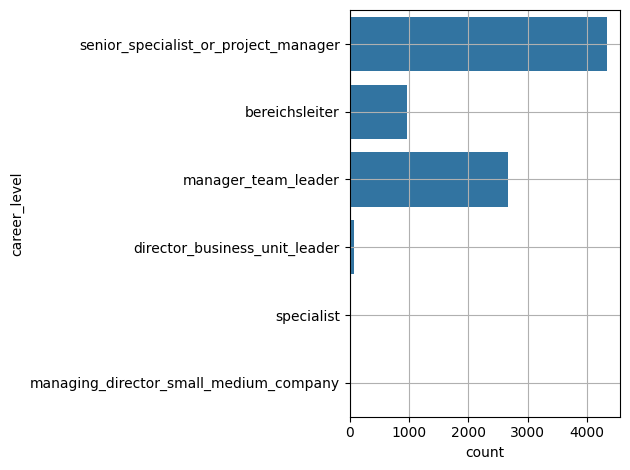

In [ ]:
sn.countplot(data["career_level"])

plt.tight_layout()
plt.grid()
plt.show()

**Để data được cân bằng hơn, chúng ta dùng oversampling**

**Lưu ý chỉ xài oversampling sau khi split data và chỉ over trong bộ train vì:**

**- cùng 1 điểm dữ liệu 0 thể cùng xuất hiện trong cả bộ train và bộ test (giống như việc đi thi mà gặp lại y nguyên bộ đề đã luyện tập)**

In [ ]:
x = data.drop("career_level", axis = 1)
y = data["career_level"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.value_counts())
print('----------------------------------------------------------------------------')
ros = SMOTEN(random_state=42, k_neighbors=2, sampling_strategy={"director_business_unit_leader": 500, "specialist": 500, "managing_director_small_medium_company": 500}) # oversampling bẳng phương pháp tổng hợp điểm
x_train, y_train = ros.fit_resample(x_train, y_train)
print(y_train.value_counts())

preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(stop_words=["English"], ngram_range=(1,2), min_df=0.01, max_df=0.95), "title"),
        ("location", OneHotEncoder(handle_unknown="ignore"), ["location"]),
        ("description", TfidfVectorizer(stop_words=["English"], ngram_range=(1,2), min_df=0.01, max_df=0.95), "description"),
        ("function", OneHotEncoder(), ["function"]),
        ("industry", TfidfVectorizer(stop_words=["English"], ngram_range=(1,2), min_df=0.01, max_df=0.95), "industry")
    ])

career_level
senior_specialist_or_project_manager      3470
manager_team_leader                       2138
bereichsleiter                             768
director_business_unit_leader               56
specialist                                  24
managing_director_small_medium_company       3
Name: count, dtype: int64
----------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validati

career_level
senior_specialist_or_project_manager      3470
manager_team_leader                       2138
bereichsleiter                             768
specialist                                 500
director_business_unit_leader              500
managing_director_small_medium_company     500
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ValueDifferenceMetric or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
cls = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("select", SelectKBest(chi2, k=500)),
    ('classifier', SVC())
    ])

---
Một trong những cách để tăng performance của model là gộp những class thiểu số lại với nhau thành 1 label lớn, sau đó xây dựng model khác để phân loại những class đã gộp

Lưu ý:

Chỉ gộp những class có thứ bậc liên tiếp nhau ( phân hạng cao hoặc thấp như nhau ) để model k bị học sai ( nếu class bậc bé gộp class bậc lớn thì gây rối loạn cho mô hình, những class ở giữa không biết học như nào )

---




---
một cách nữa để tăng perform của model là giữ lại 1 số lượng feature qtrọng nhất cho model

VD trong model này có hơn 6000 features, dùng ***SelectKBest*** để chọn lại tầm 1000 features qtrọng nhất


In [ ]:
parameters = {
    "classifier__kernel": ["linear", "sigmoid"],
    "classifier__gamma": ["scale", "auto"],
    "classifier__degree": [2,3,4]
}

In [ ]:
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['english'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['english'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['english'] not in stop_words.
  warnings.warn(


                                        precision    recall  f1-score   support

                        bereichsleiter       0.60      0.27      0.37       192
         director_business_unit_leader       0.57      0.57      0.57        14
                   manager_team_leader       0.65      0.57      0.61       534
managing_director_small_medium_company       0.00      0.00      0.00         1
  senior_specialist_or_project_manager       0.75      0.90      0.82       868
                            specialist       1.00      0.17      0.29         6

                              accuracy                           0.71      1615
                             macro avg       0.60      0.41      0.44      1615
                          weighted avg       0.70      0.71      0.69      1615



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
